In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.shape

(435849, 25)

## Data Cleaning

In [4]:
# Removing rows with missing price and year
df.drop(df[df['price'] == 0].index, inplace = True) 
df.drop(df[df['year'].isna()].index, inplace = True) 
df.drop(df[df['year'] == 2021].index, inplace = True)

In [5]:
# Changing type of year to int
df['year'] = df['year'].astype(int)
df['year'].dtype

dtype('int64')

In [6]:
year_med =  dict(df.groupby('year')['odometer'].median())

In [7]:
# Imputing missing values in odometer with median odometer of each year cars
df['odometer'] = df['odometer'].fillna(df['year'].apply(lambda x: year_med.get(x)))

In [8]:
# Removing the leftover missing values in odometer because no information available for those years
df.drop(df[df['odometer'].isna()].index, inplace = True) 

In [9]:
df.shape

(403931, 25)

In [10]:
# Dropping cars with price less than 1000 with miles less than 60,000 and model year greater than 2010
df.drop(df[(df.price < 1000 ) & (df.odometer < 60000 ) & (df.year > 2010)].index, inplace = True)
df.drop(df[(df.price < 200)].index, inplace = True)
df.drop(df[(df.price > 50000)].index, inplace = True)

In [11]:
df.shape

(392338, 25)

In [12]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012,jeep,patriot,like new,4 cylinders,gas,104500.5,clean,automatic,NaN,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014,bmw,328i m-sport,good,NaN,gas,76237.0,clean,automatic,NaN,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,1GCCS196448191644,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
5,7120432569,https://maine.craigslist.org/ctd/d/bad-credit-...,maine,https://maine.craigslist.org,500,2010,NaN,$500 DOWN PROGRAMS!!!,NaN,NaN,gas,120909.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_7qTZ8KZK03...,☛WE have 100's OF VEHICLES to choose from! CAL...,NaN,me,42.8424,-71.1077


In [13]:
# Dropping rows with missing cylinders, transmission and drive
df.drop(df[(df['cylinders'].isna()) & (df['transmission'].isna()) & (df['drive'].isna())].index, inplace = True)

In [14]:
df['cylinders'] = df['cylinders'].apply(lambda x: x[0] if not pd.isnull(x) else np.nan)

In [15]:
# Changing cylinders of tesla cars to 0
df.loc[df.manufacturer == 'tesla', 'cylinders'] = 0
df.cylinders.fillna(0, inplace = True)
df.cylinders =  df.cylinders.replace('o', 0)

In [16]:
df['cylinders'] = df['cylinders'].astype(int)


In [17]:
# Changing cylinder of all 2019 honda accords to 4
df.loc[((df.manufacturer == 'honda') & (df.year == 2019) & (df.model == 'accord')), 'cylinders'] = 4

In [18]:
df.loc[((df.manufacturer == 'honda') & (df.year == 2020) & (df.model == 'accord')),'cylinders'] = 4

In [19]:
# Dropping unwanted columns
df.drop(['id', 'url', 'region_url', 'vin', 'county', 'lat', 'long','image_url', 'region'], axis = 1, inplace = True) 

In [20]:
df.shape

(391558, 16)

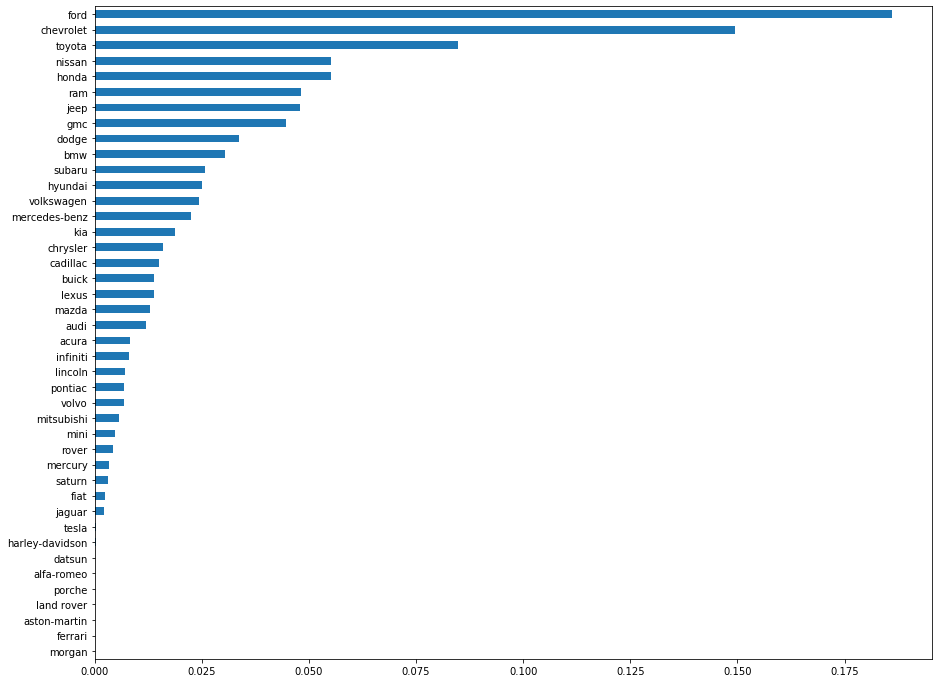

In [21]:
plt.figure(figsize=(15,12))
df['manufacturer'].value_counts(normalize = True, ascending = True).plot(kind='barh')

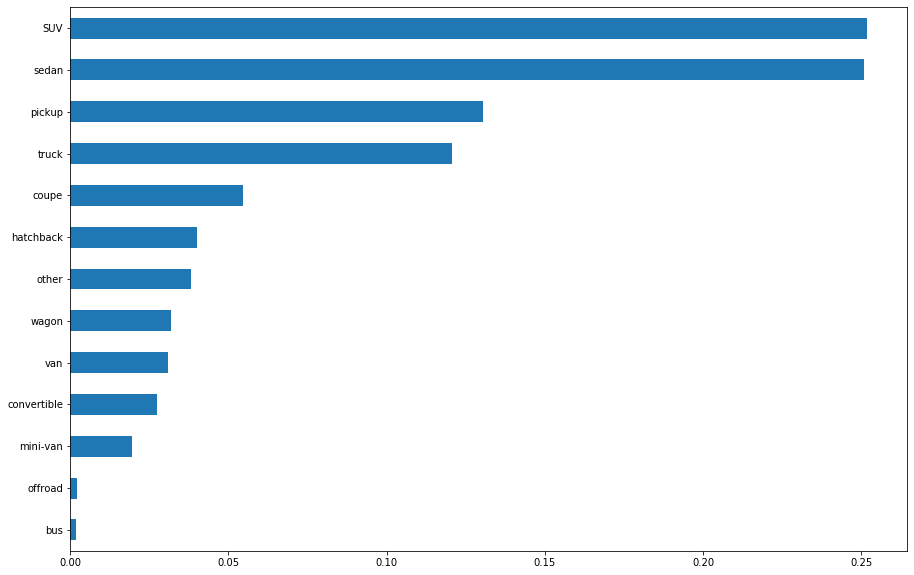

In [22]:
plt.figure(figsize=(15,10))
df['type'].value_counts(normalize = True, ascending = True).plot(kind='barh')

In [24]:
df.isna().sum()

price                0
year                 0
manufacturer     16073
model             5519
condition       157495
cylinders            0
fuel              2199
odometer             0
title_status      1130
transmission      1045
drive           106883
size            264430
type            104676
paint_color     117984
description          2
state                0
dtype: int64

## Feature Engineering


In [25]:
df.shape

(391558, 16)

In [26]:
df.year.dtype

dtype('int64')

In [27]:
df['description'][3]

'2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MILES !! rear wheel drive, extended cab, ZQ8 sport handling package, 3.5L 5cyl, 3.73 rear axle, 4L60E automatic transmission, air conditioning, power brakes, power steering, power windows, power door locks, power exterior mirrors, automatic headlights, sliding rear window, AM/FM/CD/satellite radio, HD trailer package, 4600 lb. GVW, bed liner, Dark Pewter interior, Victory Red exterior. Everything works. Excelent condition.'

In [28]:
# Going through description to check how many cars have new tires and creating a column for new tires
df['new_tires'] = np.where((df['description'].str.contains('new tire')) |
                           (df['description'].str.contains('NEW TIRE')) |
                           (df['description'].str.contains('New Tire')) |
                           (df['description'].str.contains('new TIRE')) |
                           (df['description'].str.contains('NEW tire')), 1,0) 



In [29]:
df['new_tires'].sum()

23763

In [30]:
df['heated_seats'] = np.where((df['description'].str.contains('HEATED SEAT')) |
                           (df['description'].str.contains('heated seat')) |
                           (df['description'].str.contains('Heated Seat')) |
                           (df['description'].str.contains('heated SEAT')) |
                           (df['description'].str.contains('HEATED seat')), 1,0)

In [31]:
df['heated_seats'].sum()

36562

In [32]:
df['auto_headlight'] = np.where((df['description'].str.contains('automatic headlight')) |
                                (df['description'].str.contains('auto headlight')) |
                                (df['description'].str.contains('AUTOMATIC HEADLIGHT')) |
                                (df['description'].str.contains('Automatic Headlight')) |
                                (df['description'].str.contains('AUTO HEADLIGHT')) |
                                (df['description'].str.contains('Auto Headlight')), 1,0)

In [33]:
df['auto_headlight'].sum()

20736

In [41]:
df['power steering'] = np.where((df['description'].str.contains('power steering')) |
                                (df['description'].str.contains('POWER STEERING')) |
                                (df['year'] > 2000), 1,0)

In [42]:
df['power steering'].sum()

361293

360115